# Curvatures

In [1]:
import os
import numpy as np
from matplotlib import cm

In [2]:
from tinymesh import Mesh
from viewer import Viewer

## Load mesh file

In [3]:
models_dir = "../../data/models"
filename = os.path.join(models_dir, "fandisk.ply")
mesh = Mesh(filename)

## Computer vertex normals

In [4]:
nv = mesh.num_vertices()
normals = np.zeros((nv, 3))
for i in range(nv):
    v = mesh.vertex(i)
    normals[i] = v.normal()

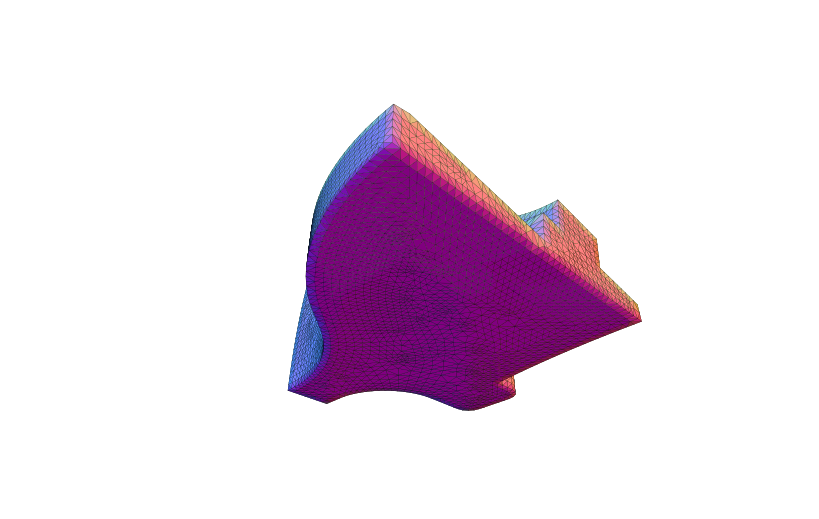

In [10]:
viewer = Viewer(800, 500)
viewer.lookat(5, 5, -5, 0, 0, 0, 0, 1, 0)
viewer.perspective(45, viewer.aspect, 1, 100)
viewer.mesh_visualization(mesh, colors=normals * 0.5 + 0.5)

## Compute curvatures

In [6]:
nv = mesh.num_vertices()
Hs = np.zeros(nv)
Ks = np.zeros(nv)
for i in range(nv):
    v = mesh.vertex(i)
    Hs[i] = v.H()
    Ks[i] = v.K()

In [7]:
Hs = np.clip(Hs, -1.0, 1.0) * 0.5 + 0.5
Ks = np.clip(Ks, -1.0, 1.0) * 0.5 + 0.5

## Gaussian curvature

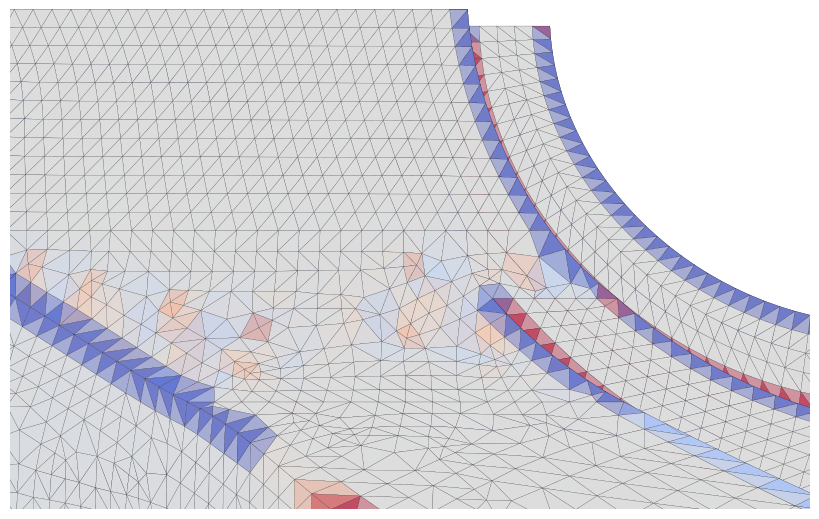

In [8]:
colorK = cm.coolwarm(Ks)
viewer.mesh_visualization(mesh, colors=colorK)

## Mean curvature

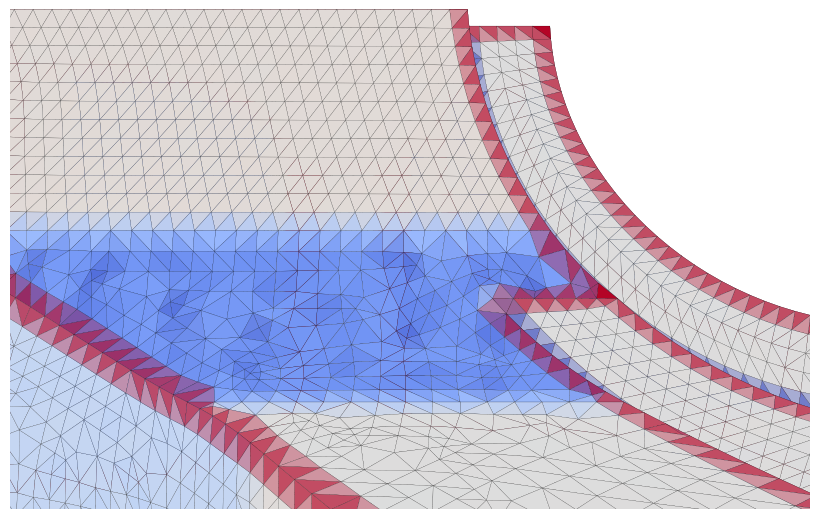

In [9]:
colorH = cm.coolwarm(Hs)
viewer.mesh_visualization(mesh, colors=colorH)